In [1]:
import numpy as np
import sklearn
import random
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import pearsonr

In [2]:
# Step 2 - Create vectors and normalize them
p1 = np.array([[1, -1, -1, -1, -1, 1,
      -1, 1, 1, 1, 1, -1,
      -1, 1, 1, 1, 1, -1,
      -1, 1, 1, 1, 1, -1, 
      1, -1, -1, -1,-1, 1]])

p2 = np.array([[1, 1, 1, 1, 1, 1,
      -1, 1, 1, 1, 1, 1,
      -1, -1, -1, -1, -1, -1,
      1, 1, 1, 1, 1, 1, 
      1, 1, 1, 1,1, 1]])

p3 = np.array([[-1, 1, 1, 1, 1, 1,
      -1, 1, 1, -1, -1, -1,
      -1, 1, 1, -1, 1, -1,
      1, -1, -1, 1, 1, -1, 
      1, 1, 1, 1, 1, -1]])

p1_norm = sklearn.preprocessing.normalize(p1).ravel()
p2_norm = sklearn.preprocessing.normalize(p2).ravel()
p3_norm = sklearn.preprocessing.normalize(p3).ravel()

In [3]:
def reverse_3_pixles(input_pattern):
    output_pattern = input_pattern.copy()
    pixle = random.randint(0, 29)
    pixles_changed = []
    for index in range(0, 3):
        while(pixle in pixles_changed):
            pixle = random.randint(0, 29)
        pixles_changed.append(pixle)
        if input_pattern[0][pixle] == 1:
            output_pattern[0][pixle] = -1
        else:
            output_pattern[0][pixle] = 1
    return output_pattern

# Step 4 - Create normalized noisy patterns

p1_noisy = reverse_3_pixles(p1)
p2_noisy = reverse_3_pixles(p2)
p3_noisy = reverse_3_pixles(p3)

p1_noisy_norm = sklearn.preprocessing.normalize(p1_noisy).ravel()
p2_noisy_norm = sklearn.preprocessing.normalize(p2_noisy).ravel()
p3_noisy_norm = sklearn.preprocessing.normalize(p3_noisy).ravel()

In [4]:
# Step 3 - Create a weight matrix and set the expected outputs for the autoassociator
expected_output = np.array([p1.ravel(), p2.ravel(), p3.ravel()])
inputs = np.array([p1_norm, p2_norm, p3_norm])

In [5]:
weights_hebb = np.dot(expected_output.transpose(), inputs)

In [6]:
inputs_square = np.dot(inputs, inputs.transpose())
inverse_inputs_square = np.linalg.inv(inputs_square)

pseudo_inverse = np.dot(inputs.transpose(), inverse_inputs_square)

weights_pseudo = np.dot(pseudo_inverse, expected_output)

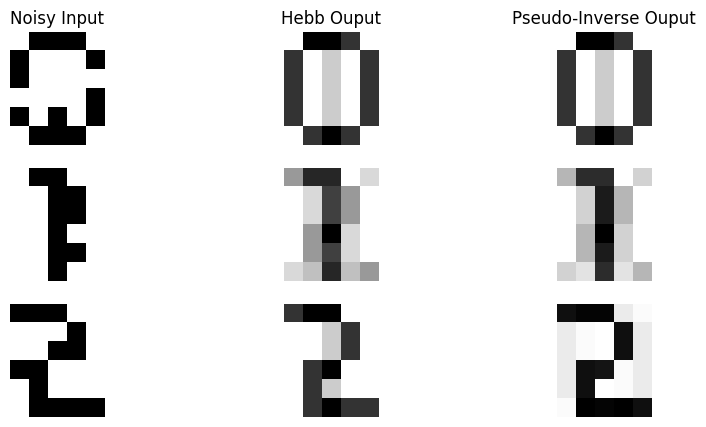

In [ ]:
# Create a figure and a set of subplots with 3 row and 3 columns
fig, axs = plt.subplots(3, 3, figsize=(10, 5))

axs[0][0].imshow(np.rot90(np.reshape(p1_noisy, (5,6))), cmap='grey')
axs[0][0].set_title("Noisy Input")
axs[0][0].axis('off') # Hide axes ticks
p1_noisy_result_hebb = np.dot(weights_hebb, p1_noisy_norm)
axs[0][1].imshow(np.rot90(np.reshape(p1_noisy_result_hebb, (5,6))), origin='lower', cmap='grey')
axs[0][1].set_title("Hebb Ouput")
axs[0][1].axis('off') # Hide axes ticks
p1_noisy_result_pseudo = np.dot(weights_pseudo, p1_noisy_norm)
axs[0][2].imshow(np.rot90(np.reshape(p1_noisy_result_pseudo, (5,6))), origin='lower', cmap='grey')
axs[0][2].set_title("Pseudo-Inverse Ouput")
axs[0][2].axis('off') # Hide axes ticks

axs[1][0].imshow(np.rot90(np.reshape(p2_noisy, (5,6))), origin='lower', cmap='grey')
axs[1][0].axis('off') # Hide axes ticks
p2_noisy_result_hebb = np.dot(weights_hebb, p2_noisy_norm)
axs[1][1].imshow(np.rot90(np.reshape(p2_noisy_result_hebb, (5,6))), origin='lower', cmap='grey')
axs[1][1].axis('off') # Hide axes ticks
p2_noisy_result_pseudo = np.dot(weights_pseudo, p2_noisy_norm)
axs[1][2].imshow(np.rot90(np.reshape(p2_noisy_result_pseudo, (5,6))), origin='lower', cmap='grey')
axs[1][2].axis('off') # Hide axes ticks

axs[2][0].imshow(np.rot90(np.reshape(p3_noisy, (5,6))), origin='lower', cmap='grey')
axs[2][0].axis('off') # Hide axes ticks
p3_noisy_result_hebb = np.dot(weights_hebb, p3_noisy_norm)
axs[2][1].imshow(np.rot90(np.reshape(p3_noisy_result_hebb, (5,6))), origin='lower', cmap='grey')
axs[2][1].axis('off') # Hide axes ticks
p3_noisy_result_pseudo = np.dot(weights_pseudo, p3_noisy_norm)
p2_noisy_result_pseudo = np.dot(weights_pseudo, p2_noisy_norm)
axs[2][2].imshow(np.rot90(np.reshape(p3_noisy_result_pseudo, (5,6))), origin='lower', cmap='grey')
axs[2][2].axis('off') # Hide axes ticks

plt.show()

In [8]:
output_1_corr = [pearsonr(p1.ravel(), p1_noisy_result_hebb)[0], pearsonr(p2.ravel(), p1_noisy_result_hebb)[0], pearsonr(p3.ravel(), p1_noisy_result_hebb)[0]]
output_2_corr = [pearsonr(p1.ravel(), p2_noisy_result_hebb)[0], pearsonr(p2.ravel(), p2_noisy_result_hebb)[0], pearsonr(p3.ravel(), p2_noisy_result_hebb)[0]]
output_3_corr = [pearsonr(p1.ravel(), p3_noisy_result_hebb)[0], pearsonr(p2.ravel(), p3_noisy_result_hebb)[0], pearsonr(p3.ravel(), p3_noisy_result_hebb)[0]]

data = {
    'Pattern': ['Pattern 1', 'Pattern 2', 'Pattern 3'],
    'Output 1': output_1_corr,
    'Output 2': output_2_corr,
    'Output 3': output_3_corr
}

df = pd.DataFrame(data)
print("Correlation between clean inputs and noisy outputs For Hebbian Learning")
print(df)

Correlation between clean inputs and noisy outputs For Hebbian Learning
     Pattern  Output 1  Output 2  Output 3
0  Pattern 1  0.977926 -0.301992 -0.085537
1  Pattern 2  0.167569  0.886788  0.384659
2  Pattern 3 -0.040373  0.561302  0.979953


In [9]:
output_1_corr = [pearsonr(p1.ravel(), p1_noisy_result_pseudo)[0], pearsonr(p2.ravel(), p1_noisy_result_pseudo)[0], pearsonr(p3.ravel(), p1_noisy_result_pseudo)[0]]
output_2_corr = [pearsonr(p1.ravel(), p2_noisy_result_pseudo)[0], pearsonr(p2.ravel(), p2_noisy_result_pseudo)[0], pearsonr(p3.ravel(), p2_noisy_result_pseudo)[0]]
output_3_corr = [pearsonr(p1.ravel(), p3_noisy_result_pseudo)[0], pearsonr(p2.ravel(), p3_noisy_result_pseudo)[0], pearsonr(p3.ravel(), p3_noisy_result_pseudo)[0]]

data = {
    'Pattern': ['Pattern 1', 'Pattern 2', 'Pattern 3'],
    'Output 1': output_1_corr,
    'Output 2': output_2_corr,
    'Output 3': output_3_corr
}

df = pd.DataFrame(data)
print("Correlation between clean inputs and noisy outputs For Pseudo-Inverse Learning")
print(df)

Correlation between clean inputs and noisy outputs For Pseudo-Inverse Learning
     Pattern  Output 1  Output 2  Output 3
0  Pattern 1  0.977926 -0.318319 -0.013332
1  Pattern 2  0.167569  0.947960  0.174837
2  Pattern 3 -0.040373  0.354292  0.997517
